# Movie Review Analysis using Natural Language Processing (NLP) Techniques

Through this project, we have answered various questions central to analyzing movie reviews of various genres through NLP techniques.

# Topic 1: Sentiment Analysis of movie reviews

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Encoding didn't work, so try reading the CSV file with different encodings
encodings_to_try_review = ['utf-8', 'latin1', 'ISO-8859-1']
encodings_to_try_info = encodings_to_try_review

for encoding_review in encodings_to_try_review:
    for encoding_info in encodings_to_try_info:
        try:
            df_original = pd.read_csv("movie_reviews.csv", encoding=encoding_review)
            #df_info = pd.read_csv("movie_info.csv", encoding=encoding_info)
            # If successful, break out of the loop
            break
        except UnicodeDecodeError:
            continue

df_original.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
print("number of rows: ",len(df_original))

number of rows:  50000


In [3]:
#we'll work with a subset of data
df_review = df_original.loc[:10000,:].copy()

#removes all missing values (e.g. NaN values) from the table.
df_review.dropna(inplace = True)

#function that counts the number of words in a text string
def count_words(text):
    """
    input: a string, typically a movie review raw text
    output: the number of words
    """
    words = re.findall(r'\b\w+\b', text)
    return len(words)

#creates a new column 'word count' that counts the number of words in a review
df_review['word_count'] = df_review['review'].apply(count_words)

#renames the 'review' column name to 'raw text' to avoid confusion later
df_review.rename(columns = {'review' : 'raw_text'}, inplace = True)

#exclude characters other than A-Z and a-z on the ASCII table
non_english_characters = ["<br />"] + [chr(i) for i in range(0, 32)] + [chr(i) for i in range(33, 65)] + [chr(i) for i in range(91, 97)] + [chr(i) for i in range(123, 256)]

# Combine non-English characters into a single regular expression pattern
pattern = '|'.join(map(re.escape, non_english_characters))

# Apply the replacement to the entire column in one go
df_review['raw_text'] = df_review['raw_text'].replace(pattern, '', regex=True)

df_review.head()

,raw_text,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,320
1,A wonderful little production The filming tech...,positive,166
2,I thought this was a wonderful way to spend ti...,positive,172
3,Basically theres a family where a little boy J...,negative,141
4,Petter Matteis Love in the Time of Money is a ...,positive,236


In [4]:
import string

# function that removes all punctuations from a given text string
def remove_punct(text):
    punct_free = "".join([i for i in text if i not in string.punctuation])
    return punct_free

# creates another column of modified text, 'no punctuation text'
df_review['modified_text'] = df_review['raw_text'].apply(remove_punct)

df_review = df_review[['raw_text', 'modified_text', 'sentiment', 'word_count']]

# uncomment the following if you want all words in lower case letters. Before doing that, think about whether you really
# need to do that. For example, for NER, you probably don't want to lower-case all words since proper nouns
# begin with capital letters. E.g. "Hunter" is a name while "hunter" is a job
# df_review['raw text'] = df_review['raw text'].apply(lambda x: x.lower())

# check to see if this is what you want
df_review.head()

,raw_text,modified_text,sentiment,word_count
0,One of the other reviewers has mentioned that ...,One of the other reviewers has mentioned that ...,positive,320
1,A wonderful little production The filming tech...,A wonderful little production The filming tech...,positive,166
2,I thought this was a wonderful way to spend ti...,I thought this was a wonderful way to spend ti...,positive,172
3,Basically theres a family where a little boy J...,Basically theres a family where a little boy J...,negative,141
4,Petter Matteis Love in the Time of Money is a ...,Petter Matteis Love in the Time of Money is a ...,positive,236


In [5]:
# tokenize text into words
# FYI, \W means non-english-characters, e.g. an empty space, a tab, etc. '+' means 'at least one such character'
# so the reg. expression '\W+' splits the text into
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens

# applying function to the column
df_review['modified_text']= df_review['modified_text'].apply(tokenization)

df_review.head()

,raw_text,modified_text,sentiment,word_count
0,One of the other reviewers has mentioned that ...,"[One, of, the, other, reviewers, has, mentione...",positive,320
1,A wonderful little production The filming tech...,"[A, wonderful, little, production, The, filmin...",positive,166
2,I thought this was a wonderful way to spend ti...,"[I, thought, this, was, a, wonderful, way, to,...",positive,172
3,Basically theres a family where a little boy J...,"[Basically, theres, a, family, where, a, littl...",negative,141
4,Petter Matteis Love in the Time of Money is a ...,"[Petter, Matteis, Love, in, the, Time, of, Mon...",positive,236


In [6]:
# we now exclude stop words

# importing nlp library
import nltk
# Download the 'stopwords' resource if you don't have it already
# nltk.download('stopwords')

# Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

df_review['modified_text']= df_review['modified_text'].apply(remove_stopwords)

df_review.head()

,raw_text,modified_text,sentiment,word_count
0,One of the other reviewers has mentioned that ...,"[One, reviewers, mentioned, watching, Oz, epis...",positive,320
1,A wonderful little production The filming tech...,"[A, wonderful, little, production, The, filmin...",positive,166
2,I thought this was a wonderful way to spend ti...,"[I, thought, wonderful, way, spend, time, hot,...",positive,172
3,Basically theres a family where a little boy J...,"[Basically, theres, family, little, boy, Jake,...",negative,141
4,Petter Matteis Love in the Time of Money is a ...,"[Petter, Matteis, Love, Time, Money, visually,...",positive,236


In [7]:
# now we lemmatize words
# "lemmatizing a word" means, for example, we change "goes" and "going" to "go" and "did" to "do".

# first downlaod necessary package
import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# defining the function for lemmatization
# I am told by ChatGPT that this still might not make irregular past tense verbs into present tense
def lemmatizer(wordlist):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in wordlist]
    lemm_text= [wordnet_lemmatizer.lemmatize(word, pos='v') for word in lemm_text]
    lemm_text = [wordnet_lemmatizer.lemmatize(word, pos='n') for word in lemm_text]
    lemm_text = [wordnet_lemmatizer.lemmatize(word, pos='a') for word in lemm_text]
    lemm_text = [wordnet_lemmatizer.lemmatize(word, pos='r') for word in lemm_text]
    return lemm_text

# lemmatize each no-stopword-text reviews
df_review['modified_text']=df_review['modified_text'].apply(lemmatizer)

df_review.head()

,raw_text,modified_text,sentiment,word_count
0,One of the other reviewers has mentioned that ...,"[One, reviewer, mention, watch, Oz, episode, y...",positive,320
1,A wonderful little production The filming tech...,"[A, wonderful, little, production, The, film, ...",positive,166
2,I thought this was a wonderful way to spend ti...,"[I, think, wonderful, way, spend, time, hot, s...",positive,172
3,Basically theres a family where a little boy J...,"[Basically, there, family, little, boy, Jake, ...",negative,141
4,Petter Matteis Love in the Time of Money is a ...,"[Petter, Matteis, Love, Time, Money, visually,...",positive,236


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(max_df = 0.2, min_df = 30, stop_words = 'english')

counts = vec.fit_transform(df_review['raw_text'])
count_df = pd.DataFrame(counts.toarray(), columns = vec.get_feature_names_out())
df_review = pd.concat((df_review, count_df), axis = 1)

# keep only the columns that start with an English alphabet letter
filtered_cols = [col for col in df_review.columns if col[0].isalpha()]

# Select only the filtered columns from the DataFrame
df_review = df_review[filtered_cols]
df_review.head()

# creates separate dataframe for positive and negative reviews
#df_pos = df_review[df_review['sentiment'] == 'positive']
#df_neg = df_review[df_review['sentiment'] == 'negative']

,raw_text,modified_text,sentiment,word_count,abandoned,abc,abilities,ability,able,abrupt,...,young,younger,youre,youth,youthful,youve,zero,zombie,zombies,zone
0,One of the other reviewers has mentioned that ...,"[One, reviewer, mention, watch, Oz, episode, y...",positive,320,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A wonderful little production The filming tech...,"[A, wonderful, little, production, The, film, ...",positive,166,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,I thought this was a wonderful way to spend ti...,"[I, think, wonderful, way, spend, time, hot, s...",positive,172,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Basically theres a family where a little boy J...,"[Basically, there, family, little, boy, Jake, ...",negative,141,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,Petter Matteis Love in the Time of Money is a ...,"[Petter, Matteis, Love, Time, Money, visually,...",positive,236,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_review, test_size=0.4, random_state=42)

# Define the features and target variable
features_to_drop = ['raw_text', 'modified_text', 'sentiment', 'word_count']

X_train, y_train = train.drop(features_to_drop, axis=1), train['sentiment']
X_test, y_test = test.drop(features_to_drop, axis=1), test['sentiment']

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

LR = LogisticRegression(max_iter = 500)
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train), cross_val_score(LR, X_train, y_train, cv = 5).mean())

0.9973333333333333 0.8400000000000001


In [11]:
# Calculates the best value of the hyperparameter C that gives us best accuracy

best_C = 0.005
best_cv_score = 0
for C in np.linspace(0.005, 0.05, 10):
    LR = LogisticRegression(C = C, max_iter = 1000)
    cv_score = cross_val_score(LR, X_train, y_train, cv = 5).mean()
    if cv_score > best_cv_score:
        best_cv_score = cv_score
        best_C = C

In [12]:
LR = LogisticRegression(C = best_C, max_iter = 1000)
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.8400399900024994

In [13]:
word_weight_df = pd.DataFrame({"word" : X_train.columns, "weight" : LR.coef_[0], })
word_weight_df

,word,weight
0,abandoned,-0.043797
1,abc,0.093841
2,abilities,0.007859
3,ability,0.020434
4,able,-0.024191
...,...,...
4339,youve,-0.001059
4340,zero,-0.117225
4341,zombie,-0.093396
4342,zombies,-0.077769


In [14]:
word_weight_df.sort_values('weight', ascending = True).head(10)

,word,weight
4300,worst,-0.815572
4193,waste,-0.743848
273,awful,-0.660781
2859,poor,-0.629403
408,boring,-0.562556
1858,horrible,-0.534157
4299,worse,-0.527971
3850,terrible,-0.499296
3761,supposed,-0.417277
1176,dull,-0.413729


In [15]:
word_weight_df.sort_values('weight', ascending = False).head(10)

,word,weight
1322,excellent,0.716284
2312,loved,0.560493
2767,perfect,0.549609
1435,favorite,0.545451
4277,wonderful,0.515277
1264,enjoyed,0.406993
344,best,0.405081
1415,fantastic,0.397579
441,brilliant,0.396782
136,amazing,0.369652


In [16]:
df_data = df_review[['raw_text','modified_text','sentiment','word_count']].copy()

def word_weight(word):
    if word in word_weight_df['word'].values:
        row_appearing = word_weight_df[word_weight_df['word'] == word]
        return row_appearing['weight'].values[0]
    else:
        return 0

def total_score(text_list):
    return sum(word_weight(word) for word in text_list)

score_dict = {}
index_counter = 0
for text_list in df_data['modified_text']:
    score_dict[df_review.iloc[index_counter, 0]] = total_score(text_list)
    index_counter += 1
    
df_data['total_score'] = df_data['modified_text'].apply(total_score)
df_data.head()

,raw_text,modified_text,sentiment,word_count,total_score
0,One of the other reviewers has mentioned that ...,"[One, reviewer, mention, watch, Oz, episode, y...",positive,320,-0.884779
1,A wonderful little production The filming tech...,"[A, wonderful, little, production, The, film, ...",positive,166,0.757571
2,I thought this was a wonderful way to spend ti...,"[I, think, wonderful, way, spend, time, hot, s...",positive,172,0.505712
3,Basically theres a family where a little boy J...,"[Basically, there, family, little, boy, Jake, ...",negative,141,-0.680100
4,Petter Matteis Love in the Time of Money is a ...,"[Petter, Matteis, Love, Time, Money, visually,...",positive,236,0.796739


In [17]:
df_data['average_word_score'] = df_data['total_score']/df_data['word_count']

correlation = df_data['average_word_score'].corr(df_data['sentiment'].map({'positive': 1, 'negative': 0}))
print(f"Correlation between average word score and sentiment: {correlation}")

Correlation between average word score and sentiment: 0.6689554073043055


In [18]:
correlation = df_data['total_score'].corr(df_data['sentiment'].map({'positive': 1, 'negative': 0}))
print(f"Correlation between review sentiment and the sum of each words' sentiment significance weight: {correlation}")

Correlation between review sentiment and the sum of each words' sentiment significance weight: 0.6476582387838775


The machine learning model that predicts whether a movie review is positive or negative based on the sentiments of non-stop words in the review has around 80% accuracy (see below). This is significant, especially since (as the above shows) the correlation between total_Score and sentiment is only around 64%.

Accuracy: 81.859%


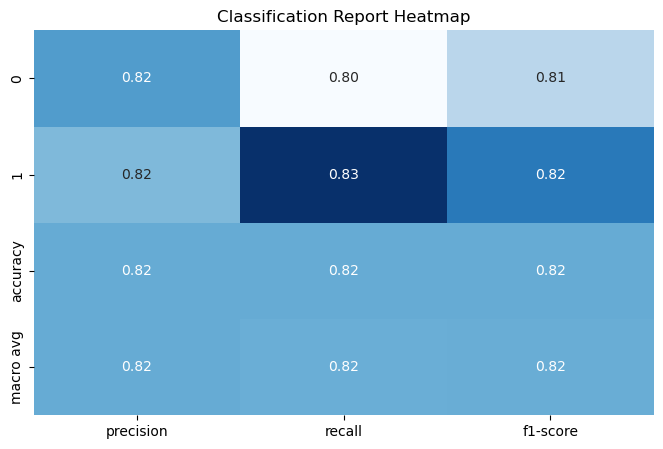

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df_data is your DataFrame
X = df_data[['total_score']]
y = df_data['sentiment'].map({'positive': 1, 'negative': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {(accuracy*100).round(3)}%")

# Get the classification report
report = classification_report(y_test, predictions, output_dict=True)

# Convert the classification report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f", cbar=False)
plt.title('Classification Report Heatmap')
plt.show()

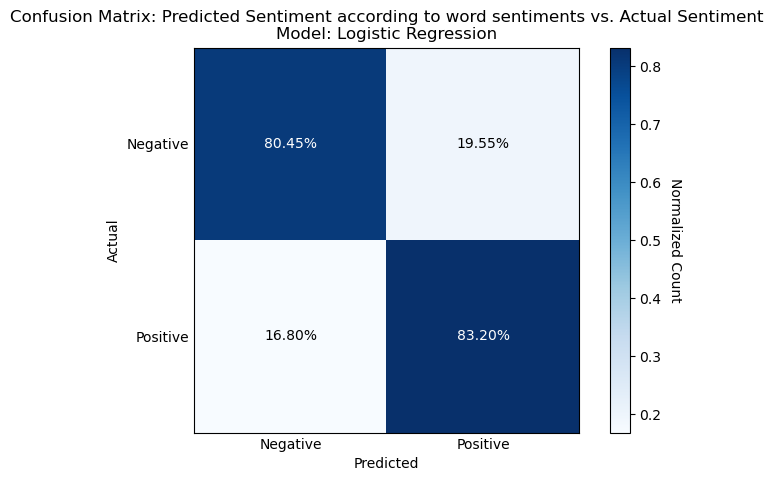

In [20]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the heatmap using Matplotlib's imshow
plt.figure(figsize=(8, 5))
im = plt.imshow(cm_normalized, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix: Predicted Sentiment according to word sentiments vs. Actual Sentiment\
\nModel: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_labels = ['Negative', 'Positive']
plt.xticks([0, 1], tick_labels)
plt.yticks([0, 1], tick_labels)

# Add a vertical colorbar
cbar = plt.colorbar(im)
cbar.set_label('Normalized Count', rotation=270, labelpad=15)

# Add text annotations
for i in range(len(tick_labels)):
    for j in range(len(tick_labels)):
        text = f"{cm_normalized[i, j]*100:.2f}%"
        color_index = (i+j)%2 - 1
        color = ['black','white'][color_index]
        plt.text(j, i, text, ha='center', va='center', color=color)

# Remove ticks
plt.tick_params(axis='both', which='both', length=0)

plt.show()

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming df_data is your DataFrame
X = df_data[['total_score']]  # Use relevant features
y = df_data['sentiment']  # Assuming you have 'sentiment' column

# Convert sentiment labels to numerical values (1 for positive, 0 for negative)
y = y.map({'positive': 1, 'negative': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear SVM
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train_scaled, y_train)
linear_predictions = linear_svm.predict(X_test_scaled)

# Polynomial SVM
poly_svm = SVC(kernel='poly', degree=3, random_state=42)
poly_svm.fit(X_train_scaled, y_train)
poly_predictions = poly_svm.predict(X_test_scaled)

# Radial Basis Function (RBF) SVM
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train_scaled, y_train)
rbf_predictions = rbf_svm.predict(X_test_scaled)

# Evaluate the models
print("Linear SVM:")
print(f'Accuracy: {accuracy_score(y_test, linear_predictions)}')
print(classification_report(y_test, linear_predictions))

print("\nPolynomial SVM:")
print(f'Accuracy: {accuracy_score(y_test, poly_predictions)}')
print(classification_report(y_test, poly_predictions))

print("\nRBF SVM:")
print(f'Accuracy: {accuracy_score(y_test, rbf_predictions)}')
print(classification_report(y_test, rbf_predictions))

Linear SVM:
Accuracy: 0.8175912043978011
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       977
           1       0.82      0.83      0.82      1024

    accuracy                           0.82      2001
   macro avg       0.82      0.82      0.82      2001
weighted avg       0.82      0.82      0.82      2001


Polynomial SVM:
Accuracy: 0.7831084457771115
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       977
           1       0.90      0.65      0.75      1024

    accuracy                           0.78      2001
   macro avg       0.81      0.79      0.78      2001
weighted avg       0.81      0.78      0.78      2001


RBF SVM:
Accuracy: 0.8175912043978011
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       977
           1       0.82      0.82      0.82      1024

    accuracy                           0.82      2001
  

The Support Vector Machine (SVM) with Polynomial kernel seems to give a better picture. Let's see what this looks like graphically

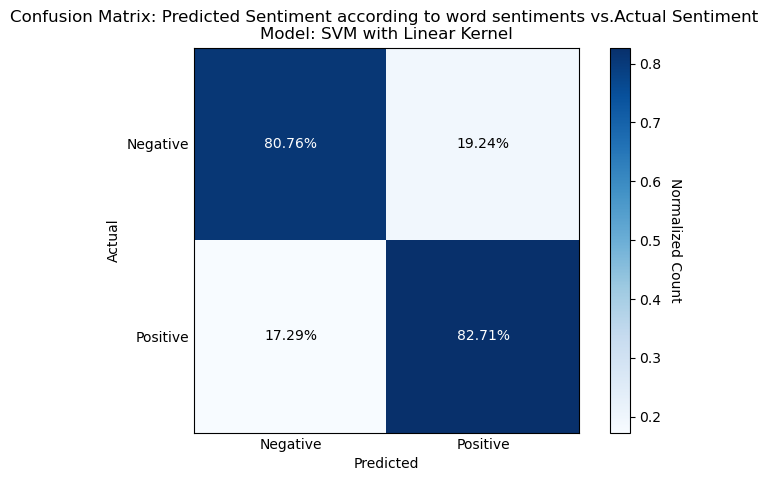

In [22]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
cm = confusion_matrix(y_test, linear_predictions)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the heatmap using Matplotlib's imshow
plt.figure(figsize=(8, 5))
im = plt.imshow(cm_normalized, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix: Predicted Sentiment according to word sentiments vs.\
Actual Sentiment \nModel: SVM with Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_labels = ['Negative', 'Positive']
plt.xticks([0, 1], tick_labels)
plt.yticks([0, 1], tick_labels)

# Add a vertical colorbar
cbar = plt.colorbar(im)
cbar.set_label('Normalized Count', rotation=270, labelpad=15)

# Add text annotations
for i in range(len(tick_labels)):
    for j in range(len(tick_labels)):
        text = f"{cm_normalized[i, j]*100:.2f}%"
        color_index = (i+j)%2 - 1
        color = ['black','white'][color_index]
        plt.text(j, i, text, ha='center', va='center', color=color)

# Remove ticks
plt.tick_params(axis='both', which='both', length=0)

plt.show()

Now, we'll give star ratings to each reviews.

In [23]:
def bin_list(df):
    max_word_score = df['total_score'].max()
    min_word_score = df['total_score'].min()
    return np.linspace(min_word_score,max_word_score,11)

#Define the bins and labels
bins = bin_list(df_data)
labels = np.arange(1,11)

df_data['star_rating (out of 10)'] = pd.cut(df_data['total_score'], bins = bins, labels = labels, right = True)

df_data.head()
pd.set_option('display.max_colwidth', 600)
print("The below are some of the 2-star reviews: ")
display(df_data[df_data['star_rating (out of 10)'] == 2][['raw_text']].head(10))
print("The below are some of the 4-star reviews: ")
display(df_data[df_data['star_rating (out of 10)'] == 4][['raw_text']].head(10))
print("The below are some of the 6-star reviews: ")
display(df_data[df_data['star_rating (out of 10)'] == 6][['raw_text']].head(10))
print("The below are some of the 8-star reviews: ")
display(df_data[df_data['star_rating (out of 10)'] == 8][['raw_text']].head(10))
print("The below are some of the 10-star reviews: ")
display(df_data[df_data['star_rating (out of 10)'] == 10][['raw_text']].head(10))
pd.set_option('display.max_colwidth', 200)

The below are some of the 2-star reviews: 


,raw_text
1057,The review on the main page admits that the movie is horrible but that you should forgive it because it is nicely violent No you shouldnt There are spoilers at the end of this review but how I can spoil this rotten movie I have no idea Even if you are a die hard AlienPred fan like I am wait for the DVD It isnt worth a rental either but youll be much less inclined to truly hate this film if you pay that than bucks or better per person plus concession purchases at a theaterIn the theater I watched AVPr there were exactly two laughs both by a girl sitting next to me Other than that there wa...
2382,I hadnt heard anything about this project until I saw that it was going to be on so I watched it with a completely open mind And gee the cast is full of strong playersUnfortunately its awful I dont mean it isnt good I mean its extraordinarily bad sometimes laughably so but mostly its just boring Its strongest appeal comes from having attractive people as naked as US network TV will allow but its all tease and no substance and having nymphs as backup characters cant justify several hours of bad TVThere are two basic problems that the cast cant overcome First the script is awful Yes maki...
2703,Slither is a horror comedy that doesnt really have enough horror or comedy to qualify as one or the other It has one scene that is exceptionally good any number of zingers that work but very few real scares and not enough humor to maintain the movie In addition the script does not focus on the hero and heroine and goes off kilter in several placesA major failing of this film is that it introduces and then leaves its hero Fillion to follow Grant Grant Michael Rooker as he is first introduced and then becomes the monster This whole part of the film drags Michael Rookers character isnt that ...
3711,here was no effort put into Valentine to prevent it from being just another teenage slasher film a subgenre of horror films of which we have seen entirely too many over the last decade or so Ive heard a lot of people complaining that the film rips off several previous horror movies including everything from Halloween to Prom Night to Carrie and as much as I hate to be redundant the rip off is so blatant that it is impossible not to say anything The punch bowl over poor Jeremys head early in the film is so obviously taken from Carrie that they may as well have just said it right in the movi...
4509,Attack Force has a horrendous title and can almost certainly be judged by its awful cover because the film is horrible A mishmash of plot lines a choppy mess and a horribly stagnated pace make the film hard to watch start to finish I managed this and Im proud As a fan of Seagals work mostly of his old days its painful to see him star in such tripe True Seagals last half dozen movies or so have sucked a lot but some of them at least had some redeeming features Attack Force is a mess From conception to delivery this film has undergone many changes from an alien plot line to the current one a...
5910,There really are no redeeming factors about this show To put it simply its just terrible Absolutely dreadful Its just a dreadful reality show Not only that its dreadful fictionImagine this A bunch of overlyimaginative teenagers get together one night and go Hey Lets make a paranormal show just like Ghost Hunters and whatnot So they grab a camera harass local residents and film random landscapes behind a painfully tryingtobedramaticyetfailingmisreably monologue This show is basically a bunch of teenagers running around with a home movie camera trying to make a really bad horror documentary ...
6499,The Salena Incident is set in Arizona where six death row inmates are being transfered from the state prison for reasons never explained while driving along the heavily armed prison bus gets a flat the driver is forced to pull off the road Then two blonde birds turn up after seducing the incompetent prison guards manage to get the better of them the six prison

The below are some of the 4-star reviews: 


,raw_text
83,Fate leads Walter Sparrow to come in possession of a mysterious novel that has eerie similarities and connections to his life all based around the number As the story unfolds in real life and fiction Sparrow must figure out his connection to the book and how the story will eventually endThe Number offers an intriguing premise that is undone by a weak execution The film just failed on many different levels which is pretty disappointing because it held so much potential The screenplay was probably the worst part about it It was filled with silly sequences and laughable dialog that just kil...
135,This film could have been a decent remake and gosh knows it tried or Ms English tried Assembling talented actors together with a successful experienced writerdirector should be a formula for a decent film But Ms Englishs experience according to her IMDb bio is exclusively limited to television work and it is glaringly obvious throughout this filmI am surprised that none of the reviews I have read mention what I found most unlikeable about this film and what kept it from reaching even a portion of its potential it looked and felt like it was made for television To give some credit to Ms ...
177,Though Id heard that Cama de Gato was the worst Brazilian movie of the decade I watched it giving it a chance after all firsttime directorproducerwriter Alexandre Stockler managed to make his debut feature shot in video for just US and though it looks even cheaper I cant begin to imagine all he went through to finally get it exhibited in theaters with no big sponsors or production companies behind it then as I watched it I realized why But whatever chances youre ready to give to Cama de Gato they shrink to zero within minutes its an unbelievably preposterous verbose ideologically fanat...
179,This movie was a failure as a comedy and a film in general It was a very slow paced movie that seemed to be trying to convey a message but the message was a clich hopeless mess to begin with This movie falls on shameless environmental point even making a selfrighteous point of destroying an SUV and promoting Animal PlanetIn sitting through this I couldnt help but notice that Steve Carell got no more than a single truly funny line The only thing that could hypothetically mark this as a comedy is the pitiful attempt to give comic relief lines to Wanda Sykes Her character gets frequent cringe...
262,Demon Wind is about as much fun as breaking your legs It is definitely an awful example of a film So awful in fact that I dont even consider it a movie I describe it more as a thing a monstrous thing A thing that must be stopped at all costs My friends and I first discovered this thing buried under a big box of video tapes at my friends house It was a late night and we had nothing better to do so we decided to watch some cheesy horror movies we unfortunately picked this one Well during the minutes that this thing played we ended up laughing so hard that we almost threw up The thing is l...
263,There is a difference between a film and a movie A film regardless of quality is ready for public consumption A movie is what a group of friends gets together to make over the course of a weekend with a camcorder In my time as a viewer I have seen may examples of bothOn September I attended a screening of writerdirector Jon Satejowskis Donnybrook Now having read the script and having seen two different cuts a rough cut and the finished product of this piece I can safely say it is a movie And a student movie at that It is for lack of a better word competent which is to say the director kne...
276,WARNING REVIEW CONTAINS MILD SPOILERSA couple of years back I managed to see the first five films in this franchise and was planning to do an overview of the whole Elm St series However just two years on and I find I cant remember enough about them in order to do it I guess they couldnt have made much of an impression From what I do recall some of the sequels Dream Warriors

The below are some of the 6-star reviews: 


,raw_text
0,One of the other reviewers has mentioned that after watching just Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental sec...
1,A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with...
2,I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy The plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer While some may be disappointed when they realize this is not Match Point Risk Addiction I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to loveThis was the most Id laughed at one of Woodys comedies in years dare I say a decade While Ive never been impressed with Scar...
3,Basically theres a family where a little boy Jake thinks theres a zombie in his closet his parents are fighting all the timeThis movie is slower than a soap opera and suddenly Jake decides to become Rambo and kill the zombieOK first of all when youre going to make a film you must Decide if its a thriller or a drama As a drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film I expected to see a BOOGEYMAN similar movie and instead i watched a drama with some meaningless thriller spots out of just ...
4,Petter Matteis Love in the Time of Money is a visually stunning film to watch Mr Mattei offers us a vivid portrait about human relations This is a movie that seems to be telling us what money power and success do to people in the different situations we encounter This being a variation on the Arthur Schnitzlers play about the same theme the director transfers the action to the present time New York where all these different characters meet and connect Each one is connected in one way or another to the next person but no one seems to know the previous point of contact Stylishly the film has...
5,Probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring It just never gets old despite my having seen it some or more times in the last years Paul Lukas performance brings tears to my eyes and Bette Davis in one of her very few truly sympathetic roles is a delight The kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch And the mothers slow awakening to whats happening in the world and under her own roof is believable and startling If I had a dozen thumbs th...
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in meI grew up on black and white TV and Seahunt with Gunsmoke were my heros every weekYou have my vote for a comeback of a new sea huntWe need a change of pace in TV and this would work for a world of under water adventureOh by the way thank yo

The below are some of the 8-star reviews: 


,raw_text
592,As is often the case when you attempt to take a plus page book and cram it into a two hour film a lot is lost Here director John Madden Shakespeare in Love takes on an extremely ambitious project and almost pulls it off What we get is a charming and emotionally compelling film that seems somehow incompleteThere is much about this film that is wonderful and fantastic The cinematography by John Toll Cinematographer for Braveheart and Legends of the Fall winning Oscars for both is splendid Working with Madden the choices for locations on the Greek island of Kefallonia are superb and the visu...
804,Now i have read some negative reviews for this show on this website and quite frankly Im appalled For anyone to even think that the Sopranos is not Television then im afraid i dont know what the world has come to Let me tell u something I started watching many TV shows like Lost Prison Break Dexter Deadwood and even Invasion But all of those shows lost their touch after the first season especially Lost and Prison Break which i refuse to watch because the companies took genius ideas and butchered them by making more than one season Then we have The Sopranos I can honestly say that this is ...
920,First and foremost I would like to say that before i watched this film i considered myself an accepting individual Someone that cared about others appreciated others found nobarely any judgment against other people and this film has i think changed my life or viewpoint dramatically When i watched it I didnt know particularly what it was about i knew it was about some type of forbidden relationship but other then that I was clueless and as I began to see what was taking place between these two wonderfully depicted characters i was in shock disbelief confusion and surprise The first time i w...
943,A film for mature educated audiencesI saw Random Hearts in an advance screening shortly before its North American release This romantic drama was quite a treat Im sure this story will not be everyones cup of tea especially considering the films darkly downbeat premise But the pic has some very uplifting strong points in its favorAlltime Box Office Draw Harrison Ford Star Wars Raiders of the Lost Ark The Fugitive Air Force One Patriot Games is at the top of his game as the harried and desperate Internal Affairs officer Dutch Fords very subdued nuanced performance shows quite the range he ca...
1098,This has been edited for spaceChanwook Parks new film is a complex film that is not easy to classify Nominally a horror movie the central character is a vampire the film actually has elements of comedy theology melodrama cultural invasion and its analog of viral invasion of a body romance and few other things as well Its a film that has almost too much on its mind The film takes its own matters and mixes them with classic European literature in this case Emile Zolas Thrse Raquin Its an odd mix that doesnt always gel but none the less has an incredible power Here it is almost hours since I...
1178,This movie was an excellent acted excellent directed and overall had an excellent story Ive had real life experiance with a boy like Radio At the football program in my town weve had a mentally challenged boy every year practice travel and have fun with the football team This movie is really true and i can identify with it A boy like Radio just needs to feel like they belong to something they need to feel like their life is worth living Thats how Radio feels and thats why that type of program is set up at my high school This is a very touching movie that im glad has been brought to the bi...
1234,The th animated Disney classic is often criticized by many people as mediocre or poor in quality but it is a great movieToo bad that The Aristocats doesnt get the deserved credit I personally see it as one of my favorite Disney classicsDespite being extremely underrated it is one of the funniest Disney classics It is full of hilarious some of them hysterical mo

The below are some of the 10-star reviews: 


,raw_text
8435,This comment discusses North and South Book I dealing with periodThe th century history of the USA is mostly identified by people with the Civil War This is a reasonable opinion because that was Civil War which put the Union under the severe test that was the Civil War which made Americans realize how precious it is to live in peace finally that was this period which at last brought the end to the shameful system of slavery From the birth of motion pictures there were people who adapted that time onto screen DW Griffith in the early s made his unforgettable BIRTH OF A NATION Yet the most...
9549,Oftentimes films of this nature come across as a mixed bag of great work along with slight drivel to fill the runtime Whether it be the big name support or the project itself Paris je taime never falls into this realm I believe I can truly say that the movie as a whole is better than its parts Between the wonderful transitions and the fantastic ending sequence merging characters together in one last view of love in Paris I think the film would have suffered if any cog was removed True there are definitely a few standouts that overshadow the rest but in the end I have a lasting image even i...


In [24]:
def total_score(text_list):
    score = 0
    for word in text_list:
        score += word_weight(word)
    return score

def all_preprocessed_text(string):
    punct_free = remove_punct(string)
    tokens = tokenization(punct_free)
    no_stopwords = remove_stopwords(tokens)
    lemmatized = lemmatizer(no_stopwords)
    return lemmatized

def review_score(sample):
    score_sample = total_score(all_preprocessed_text(sample))
    for i in range(10):
        if (bins[i] <= score_sample) and (score_sample <= bins[i+1]):
            return i+1

Review Sample 1:
I recently watched the movie, and I must say it left me with mixed feelings. The storyline had some interesting moments, but overall, it lacked depth and failed to engage me fully. The characters were decently developed, but there was something missing that prevented a real emotional connection. The pacing of the film felt off, with some scenes dragging on while others were rushed. The cinematography was average, with no standout moments that left a lasting impression. The soundtrack, although not terrible, failed to elevate the viewing experience. On the positive side, the acting was commendable, with the cast doing their best with the material provided. The film did manage to evoke a few laughs, but it fell short of delivering the emotional impact I was hoping for. In conclusion, the movie had its moments, but it failed to rise above mediocrity. It's not a terrible film, but it lacks the elements that make a movie truly memorable. If you're looking for something to pass the time, it might be worth a watch, but don't expect it to leave a lasting impression.

In [25]:
review_sample1 = "I recently watched the movie, and I must say it left me with mixed feelings. \
The storyline had some interesting moments, but overall, it lacked depth and failed to engage me fully. \
The characters were decently developed, but there was something missing that prevented a real emotional connection. \
The pacing of the film felt off, with some scenes dragging on while others were rushed. The cinematography was average, \
with no standout moments that left a lasting impression. The soundtrack, although not terrible, failed to elevate \
the viewing experience. On the positive side, the acting was commendable, with the cast doing their best with the \
material provided. The film did manage to evoke a few laughs, but it fell short of delivering the emotional impact I\
was hoping for. In conclusion, the movie had its moments, but it failed to rise above mediocrity. It's not a terrible \
film, but it lacks the elements that make a movie truly memorable. If you're looking for something to pass the time,\
it might be worth a watch, but don't expect it to leave a lasting impression."

print("Movie Sample 1's review score is: ",review_score(review_sample1))

Movie Sample 1's review score is:  6


Please add some more here (use "Markdown" feature that you can see at the dropdown menu right below "Help"; click on "code")

In [26]:
review_sample2 = "your review here"

print("Movie Sample 2's review score is: ", review_score(review_sample2))

Movie Sample 2's review score is:  6


Here is the reason why the move star rating method is not so effective in accurately rating short movie reviews, and why this issue is more complicated than I thought. Basically, if the movie review is too short, then the sum of the weights of all words appearing in the movie review will be relatively close to 0, whether or not it has words like "best, excellent, amazing" or "worst, horrible, poor, boring." 

I tried to fix this by changing the star rating system to calculate the average of weights of all non-english words appearing in the movie review. However, this didn't word for the following reason: even if we did this, we still wouldn't be able to accurately rate a movie review that is really long but has words like "worst, horrible," and "boring." This is because in a long and negative review, not many people use very negative words all the time; instead, they use those words sometimes and then go on to describe why they felt that way, and in their long description they use a lot of 'medium' words that make the average of word weights closer to zero. 

In other words, not many people will write "This movie is the worst movie ever. The plot was horrible. I was so bored. I would never recommend this to others. Actings were terrible. A lot of horrible actings. Made me cringe. The movie was aweful. Made me cringe...." for a paragraph; they will instead start off their movie reviews by saying "This movie is the worst movie ever. The plot was so obvious in this way and that way ... (more description of specific aspect of the movie, which would likely contain more 'neutral' words)..." 

I also tried to multiply the top 10 best and worst words' weights by 2 (see above where I did this), but this made our ML model slightly less accurate (from 80%-ish to 77%) and it also didn't help that much. I also tried to create some machine learning model that takes in both the words' weights or the total word score and the word count of each movie review as features, but it only made the accuracy worse - the reason is that there is very little correlation between how good or bad a review will be and the length of the review (in fact, the correlation coefficient was around 0.002 or 0.006 the last time I ran it).

I am thinking of several ways I could approach this issue:

(1) For the presentation, we can pick several 'medium length' reviews for our review samples to be shown to the audience, but explain after our demonstration that the rating system is less suitable for shorter reviews and why it is so. This is not embarrassing, as it shows we are willing to acknowledge our biases in our model.

(2) modify our rating system so that it divides the reviews into 'medium-to-long length' reviews and 'short length' reviews (i.e. set up arbitrary word length cut to distinguish between them) and use the 'average word weight' approach for the short length reviews and the 'total word weight' approach for the medium-to-long length reviews

(3) Filter our reviews to see only the reviews less than 15 words, say, and pick out the best 5 and worst 5 word coefficient for the short reviews. We could then modify our word_weight_df so that those words' coefficients are emplified by higher factor, e.g. 10. This in effect makes "This is the worst movie ever" into a sentence "This is the worst worst worst ... worst worst worst movie ever", making the total sum to be really negative.

(4) If (3) seems way too complicated for you, you can pick out words that stick out most to you, like "worst, "horrible," "awful," "boring," "excellent," "recommend," "fantastic," "amazing," and so on, and amplify them by a hug factor like 10, or by a custom factor for each word, e.g. 20 for 'worst' and 4 for 'mediocre'. Here are some more words: outstanding, exceptional, fantastic, extraordinary, brilliant, masterful, enthralling, riveting, captivating, remarkable, terrible, abysmal, horrendous, lackluster, disappointing.

# Topic 2: Named Entity Recognition 
## ... and Movie Review Analysis according to actors/actresses, directors, and movie characters mentioned

In [27]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [28]:
# a function to extract named entites (e.g. director names, country, etc.)
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [54]:
# Create a deep copy of df_review[[]]
from copy import deepcopy

df_data2 = deepcopy(df_review[['raw_text', 'modified_text', 'sentiment', 'word_count']])
df_data2.head()

,raw_text,modified_text,sentiment,word_count
0,One of the other reviewers has mentioned that after watching just Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its...,"[On, re, me, wa, Oz, ep, yo, ho, Th, ri, ex, ha, me, fi, th, st, Oz, br, un, sc, vi, se, ri, wo, Go, Tr, sh, fa, he, ti, Th, sh, pu, pu, re, dr, se, vi, It, ha, cl, us, wo, ca, Oz, ni, gi, Os, Ma,...",positive,320
1,A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors ar...,"[A, wonderful, little, production, The, film, technique, unassuming, oldtimebbc, fashion, give, comfort, sometimes, discomforting, sense, realism, entire, piece, The, actor, extremely, well, choos...",positive,166
2,I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy The plot is simplistic but the dialogue is wi...,"[I, think, wonderful, way, spend, time, hot, summer, weekend, sit, air, condition, theater, watch, lighthearted, comedy, The, plot, simplistic, dialogue, witty, character, likable, even, well, bre...",positive,172
3,Basically theres a family where a little boy Jake thinks theres a zombie in his closet his parents are fighting all the timeThis movie is slower than a soap opera and suddenly Jake decides to bec...,"[Basically, there, family, little, boy, Jake, think, there, zombie, closet, parent, fight, timethis, movie, slow, soap, opera, suddenly, Jake, decide, become, Rambo, kill, zombieok, first, youre, ...",negative,141
4,Petter Matteis Love in the Time of Money is a visually stunning film to watch Mr Mattei offers us a vivid portrait about human relations This is a movie that seems to be telling us what money powe...,"[Petter, Matteis, Love, Time, Money, visually, stun, film, watch, Mr, Mattei, offer, u, vivid, portrait, human, relation, This, movie, seem, tell, u, money, power, success, people, different, situ...",positive,236


In [55]:
for i in range(len(df_data2['modified_text'])):
    for j in range(len(df_data2['modified_text'][i])):
        word = df_data2['modified_text'][i][j]
        if word:
            df_data2['modified_text'][i][j] = word[0] + word[1:].lower()

df_data2['modified_text'] = df_data2['modified_text'].apply(' '.join)
df_data2['entities'] = df_data2['modified_text'].apply(extract_entities)

df_data2.head()

,raw_text,modified_text,sentiment,word_count,entities
0,One of the other reviewers has mentioned that after watching just Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its...,On re me wa Oz ep yo ho Th ri ex ha me fi th st Oz br un sc vi se ri wo Go Tr sh fa he ti Th sh pu pu re dr se vi It ha cl us wo ca Oz ni gi Os Ma Se St Pe It fo ma Em Ci ex se pr ce gl fr fa in p...,positive,320,"[(ep yo ho, PERSON), (Em Ci ho ma Mu ga, PERSON), (La Ch, PERSON), (de st do, PERSON), (Watching Oz, PERSON)]"
1,A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors ar...,A wonderful little production The film technique unassuming oldtimebbc fashion give comfort sometimes discomforting sense realism entire piece The actor extremely well choose Michael Sheen get pol...,positive,166,"[(Michael Sheen, PERSON), (Williams, PERSON), (Orton Halliwell, ORG)]"
2,I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy The plot is simplistic but the dialogue is wi...,I think wonderful way spend time hot summer weekend sit air condition theater watch lighthearted comedy The plot simplistic dialogue witty character likable even well bread suspect serial killer W...,positive,172,"[(summer weekend, DATE), (Match Point Risk Addiction, ORG), (Woody Allen, PERSON), (Scarlet Johanson, ORG), (Devil Wears Prada, ORG), (Superman, PERSON)]"
3,Basically theres a family where a little boy Jake thinks theres a zombie in his closet his parents are fighting all the timeThis movie is slower than a soap opera and suddenly Jake decides to bec...,Basically there family little boy Jake think there zombie closet parent fight timethis movie slow soap opera suddenly Jake decide become Rambo kill zombieok first youre go make film must Decide th...,negative,141,"[(Jake, PRODUCT), (Rambo, PERSON), (first, ORDINAL), (Parents, GPE), (Jake, PERSON), (Boogeyman, PERSON), (Jake ignore, PERSON)]"
4,Petter Matteis Love in the Time of Money is a visually stunning film to watch Mr Mattei offers us a vivid portrait about human relations This is a movie that seems to be telling us what money powe...,Petter Matteis Love Time Money visually stun film watch Mr Mattei offer u vivid portrait human relation This movie seem tell u money power success people different situation encounter This variati...,positive,236,"[(Mr Mattei, ORG), (Arthur Schnitzlers, PERSON), (New York, GPE), (one, CARDINAL), (Stylishly, DATE), (one, CARDINAL), (one, CARDINAL), (Steve Buscemi Rosario, PERSON), (Carol Kane, PERSON), (Mich..."


In [56]:
name_in_df = list(set(entity[0] for entities in df_data2['entities'] for entity in entities if entity[1] == 'PERSON'))

print("number of names:", len(name_in_df))

number of names: 25679


In [57]:
# uncomment the following lines if you don't have 'beautifulsoup4' and 'requests' packages already
# They are both modules for webscrapping, i.e. for getting data from the internet
# !pip install beautifulsoup4
# !pip install requests

In [58]:
import requests
from bs4 import BeautifulSoup

# This cell is webscraping 1000 best and 100 worst actors/actresses of all time 
# The result, pos_actor_info and neg_actor_info, are two lists of elements,
# with each element being a list of the form [actor/actress name, birthyear]
# Also, I have actor_info := pos_actor_info + neg_actor_infoimport re

# I may or may not use the birthyear in my data analysis

# Function to extract name and year from a given string
def extract_info(actor_string):
    match = pattern.search(actor_string)
    if match:
        name = match.group(1).strip()
        year_match = re.search(r'(19\d{2})\b', match.group(2))
        year = year_match.group(1) if year_match else None
        return [name, year]
    else:
        return None

pos_actor_web_info = []


for i in range(11):

    url = "https://www.imdb.com/list/ls058011111/?sort=list_order,asc&mode=detail&page=" + str(i)
    
    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the container that holds the list of actors and actresses
    pos_actors_container = soup.find('div', class_='lister-list')

    # Check if actors_container is not None before proceeding
    if pos_actors_container:
        # Extract actor/actress names and years using regex
        pattern = re.compile(r'<a[^>]*>\s*([^<]+)\s*</a>\s*</h3>\s*<p.*?>.*?</p>\s*<p>.*?(?:born)?(.*?)</p>', re.DOTALL)
        pos_actor_elements = pos_actors_container.find_all('div', class_='lister-item-content')

        # Check if actor_elements is not empty before extracting information
        if pos_actor_elements:
            pos_actor_web_info += [extract_info(str(pos_actor_element)) for pos_actor_element in pos_actor_elements]

print("Some famous actors or actresses: ", pos_actor_web_info[:20])

neg_actor_web_info = []

url = "https://www.imdb.com/list/ls071395299/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
# Find the container that holds the list of actors and actresses
neg_actors_container = soup.find('div', class_='lister-list')

# Check if actors_container is not None before proceeding
if neg_actors_container:
    # Extract actor/actress names and years using regex
    pattern = re.compile(r'<a[^>]*>\s*([^<]+)\s*</a>\s*</h3>\s*<p.*?>.*?</p>\s*<p>.*?(?:born)?(.*?)</p>', re.DOTALL)
    neg_actor_elements = neg_actors_container.find_all('div', class_='lister-item-content')

    # Check if actor_elements is not empty before extracting information
    if neg_actor_elements:
        neg_actor_web_info += [extract_info(str(neg_actor_element)) for neg_actor_element in neg_actor_elements]

print("\nSome infamous actors or actresses: ", neg_actor_web_info[:20])

# combine pos_actor_info and neg_actor_info into a single list
actor_web_info = pos_actor_web_info + neg_actor_web_info
            
# Display the extracted names and years
print("\nThe number of famous or infamous actors/actresses we are considering: " + str(len(actor_web_info)))

number_of_actors_with_birthdate = 0
for i in range(len(actor_web_info)):
    if actor_web_info[i][1] is None:
        continue
    elif actor_web_info[i][1] is not None:
        number_of_actors_with_birthdate += 1

print("\nNumber of those with birthdate: ", number_of_actors_with_birthdate)

Some famous actors or actresses:  [['Robert De Niro', '1943'], ['Jack Nicholson', None], ['Marlon Brando', None], ['Denzel Washington', '1954'], ['Katharine Hepburn', '1907'], ['Humphrey Bogart', None], ['Meryl Streep', '1949'], ['Daniel Day-Lewis', None], ['Sidney Poitier', None], ['Clark Gable', '1901'], ['Ingrid Bergman', None], ['Tom Hanks', None], ['Elizabeth Taylor', None], ['Bette Davis', '1908'], ['Gregory Peck', '1916'], ['Leonardo DiCaprio', '1985'], ['Cate Blanchett', '1969'], ['Audrey Hepburn', '1929'], ['Spencer Tracy', '1900'], ['Kate Winslet', None]]

Some infamous actors or actresses:  [['Gwyneth Paltrow', None], ['Tommy Wiseau', None], ['Madonna', None], ['Jaden Smith', None], ['Megan Fox', '1986'], ['Taylor Lautner', None], ['Katherine Heigl', '1978'], ['Keanu Reeves', '1964'], ['Sarah Jessica Parker', '1965'], ['Josh Hartnett', None], ['Jessica Alba', '1981'], ['Pauly Shore', '1990'], ['Denise Richards', None], ['Steven Seagal', None], ['Rosie Perez', None], ['Alex P

In [59]:
# Webscrapping a list of best and worst directors

# best directors
pos_director_web = []

for i in range(1, 4):
    url = "https://www.imdb.com/list/ls056848274/?sort=list_order,asc&mode=detail&page=" + str(i)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract director names using regex
    pattern = re.compile(r'<a[^>]*>\s*([^<]+)\n\s*</a>\s*</h3>', re.DOTALL)
    
    # Find all occurrences of the pattern in the HTML
    pos_dir_matches = re.findall(pattern, str(soup))

    # Append director names to the list
    pos_director_web.extend(pos_dir_matches)

# worst directors
neg_director_web = []

url = "https://www.imdb.com/list/ls052353923/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extract director names using regex
pattern = re.compile(r'<a[^>]*>\s*([^<]+)\n\s*</a>\s*</h3>', re.DOTALL)

# Find all occurrences of the pattern in the HTML
neg_dir_matches = re.findall(pattern, str(soup))

# Append director names to the list
neg_director_web.extend(neg_dir_matches)

# combine best and worst directors
director_web = pos_director_web + neg_director_web

print("The number of famous directors we are considering: " + str(len(director_web)))
print("\nSome of the directors we are considering:", director_web[:20])

The number of famous directors we are considering: 229

Some of the directors we are considering: ['Steven Spielberg', 'Martin Scorsese', 'Alfred Hitchcock', 'Stanley Kubrick', 'Quentin Tarantino', 'Orson Welles', 'Francis Ford Coppola', 'Ridley Scott', 'Akira Kurosawa', 'Joel Coen', 'Ethan Coen', 'John Ford', 'Sergio Leone', 'Woody Allen', 'Billy Wilder', 'Clint Eastwood', 'Frank Capra', 'Charles Chaplin', 'Christopher Nolan', 'Roman Polanski']


In [60]:
# Webscraping a list of best or most disliked movie characters

url = "https://www.empireonline.com/movies/features/100-greatest-movie-characters/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

pos_character_web = []
pattern = re.compile(r'<h2>(?:100|\d{2}|\d{1}).\s(.*?)</h2>\s*</span><div\sclass=', re.DOTALL)
matches = re.findall(pattern, str(soup))
matches[-3:-1] = 'Batman', 'Han Solo', 'James Bond' # perhaps a small glitch on the original html code, fixed this way
pos_character_web.extend(matches)

# these are for better data analysis
pos_character_web[pos_character_web.index("Gollum / Sméagol")] = r'Gollum|Sm[ée]agol'
pos_character_web[pos_character_web.index("E.T.")] = 'E.T'
pos_character_web[pos_character_web.index("Dr. King Schultz")] = 'King Schultz'
pos_character_web[pos_character_web.index("Captain Jack Sparrow")] = "Jack Sparrow"
pos_character_web[pos_character_web.index("The Terminator (T-800)")] = r'[Tt]erminator'

print("\nSome famous movie characters we are considering: ",pos_character_web[-20:])

url = "https://www.watchmojo.com/articles/top-20-hated-movie-characters"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

neg_character_web = []
pattern = re.compile(r'<h4>#\d{1,2}:\s(.*?)</h4>', re.DOTALL)
matches = re.findall(pattern, str(soup))
neg_character_web.extend(matches)
neg_character_web[11] = "Trunchbull" # small glitch from the original html

# these makes more sense for data analysis. Replace words that may not appear fully in an analysis
# with words that will likely appear. E.g. "President Barrack Obama" is replaced with "Obama"
neg_character_web[neg_character_web.index("Mayor Larry Vaughn")] = "Larry Vaughn"
neg_character_web[neg_character_web.index("The Armitage Family")] = "Armitage"
neg_character_web[neg_character_web.index("President Coriolanus Snow")] = "Coriolanus"
neg_character_web[neg_character_web.index("Mrs. Carmody")] = "Carmody"
neg_character_web[neg_character_web.index("Calvin J. Candie")] = r'Calvin(?:.*?)?Candie'

# combine pos_character_web and neg_character_web
character_web = pos_character_web + neg_character_web

print("\nInfamous movie characters we are considering: ",neg_character_web)

print("The number of well known characters we are considering: " + str(len(character_web)))


Some famous movie characters we are considering:  ['Doc Brown', 'Loki', 'Rick Blaine', 'M. Gustave', 'Ron Burgundy', 'Aragorn', 'Jack Sparrow', 'Iron Man', 'Marty McFly', 'Michael Corleone', 'The Dude', 'Darth Vader', 'Tyler Durden', 'John McClane', 'The Joker', 'Ellen Ripley', 'Batman', 'Han Solo', 'James Bond', 'Indiana Jones']

Infamous movie characters we are considering:  ['Larry Vaughn', 'Shooter McGavin', 'Yon-Suk', 'Walter Peck', 'Margaret White', 'Terence Fletcher', 'Cal Hockley', 'Armitage', 'Bill Lumbergh', 'Carter Burke', 'Biff Tannen', 'Trunchbull', 'Denethor', 'Percy Wetmore', 'Coriolanus', 'Carmody', 'Nurse Ratched', 'Captain Vidal', 'Calvin(?:.*?)?Candie', 'Dolores Umbridge']
The number of well known characters we are considering: 120


In [61]:
actor_in_reviews = list(set([actor[0] for name in name_in_df for actor in actor_web_info if actor[0] in name]))
director_in_reviews = list(set([director for name in name_in_df for director in director_web if director in name]))
character_in_reviews = list(set([character for name in name_in_df for character in character_web if character in name]))


print("\nSome well-known actors or actresses appearing in movie reviews: ", character_in_reviews[:15])
print("\nSome well-known directors appearing in movie reviews: ", director_in_reviews[:15])
print("\nSome well-known movie characters appearing in movie reviews: ", character_in_reviews[:15])


Some well-known actors or actresses appearing in movie reviews:  ['Ash', 'Aragorn', 'Darth Vader', 'Han Solo', 'Harry Callahan', 'Red', 'Michael Corleone', 'James Bond', 'Yoda', 'Ellen Ripley', 'Maximus', 'Batman', 'Driver', 'Armitage', 'Legolas']

Some well-known directors appearing in movie reviews:  ['George Clooney', 'Vincente Minnelli', 'Curtis Hanson', 'Stanley Kubrick', 'Jim Jarmusch', 'Mel Gibson', 'Carol Reed', 'Michael Powell', 'George Cukor', 'Stephen Frears', 'Harold Ramis', 'John Woo', 'Ingmar Bergman', 'David Cronenberg', 'Robert Redford']

Some well-known movie characters appearing in movie reviews:  ['Ash', 'Aragorn', 'Darth Vader', 'Han Solo', 'Harry Callahan', 'Red', 'Michael Corleone', 'James Bond', 'Yoda', 'Ellen Ripley', 'Maximus', 'Batman', 'Driver', 'Armitage', 'Legolas']


In [62]:
def calculate_ratings(name_list, df):
    ratings = []

    for name in name_list:
        # pos_rev stands for the number of positive reviews mentioning this person
        # neg_rev stands for the number of negative reviews mentioning this person
        # total_mention stands for the number of total reviews mentioning this person
        pos_rev = sum((1 for text, sentiment in zip(df['modified_text'], df_data2['sentiment']) if name in text and sentiment == 'positive'))
        neg_rev = sum((1 for text, sentiment in zip(df['modified_text'], df_data2['sentiment']) if name in text and sentiment == 'negative'))
        total_mention = pos_rev + neg_rev

        person_rating = pos_rev / total_mention if total_mention > 0 else 0

        ratings.append([name, person_rating, total_mention])

    return ratings


actor_rating = calculate_ratings(actor_in_reviews, df_data2)
director_rating = calculate_ratings(director_in_reviews, df_data2)
character_rating = calculate_ratings(character_in_reviews, df_data2)

print("\nSome well-known actor or actress's ratings:", actor_rating[:15])
print("\nSome well-known director's ratings:", director_rating[:15])
print("\nSome well-known movie character's ratings:", character_rating[:15])


Some well-known actor or actress's ratings: [['Frank Langella', 0.5, 2], ['Martin Lawrence', 0.0, 1], ['Shirley Jones', 0.6, 5], ['John Mills', 0.8571428571428571, 7], ['Jessica Lange', 0.6666666666666666, 9], ['Peter Fonda', 1.0, 1], ['Robert De Niro', 0.8181818181818182, 11], ['Rob Schneider', 0.5, 10], ['January Jones', 0.0, 2], ['Sarah Polley', 1.0, 1], ['Parker Posey', 0.875, 8], ['Russell Brand', 0.0, 1], ['Charlie Sheen', 0.3076923076923077, 13], ['Lee Marvin', 0.5, 4], ['Robert Redford', 0.4444444444444444, 9]]

Some well-known director's ratings: [['George Clooney', 0.5384615384615384, 13], ['Vincente Minnelli', 0.5, 8], ['Curtis Hanson', 0.0, 1], ['Stanley Kubrick', 0.5384615384615384, 13], ['Jim Jarmusch', 1.0, 2], ['Mel Gibson', 0.5625, 16], ['Carol Reed', 1.0, 1], ['Michael Powell', 1.0, 2], ['George Cukor', 0.0, 5], ['Stephen Frears', 0.0, 2], ['Harold Ramis', 0.0, 1], ['John Woo', 0.8888888888888888, 9], ['Ingmar Bergman', 0.3333333333333333, 6], ['David Cronenberg', 0.

In [63]:
def process_ratings(rating_list):
    rating_tuples = [tuple(item) for item in rating_list]
    unique_ratings = set(rating_tuples)
    filtered_ratings = [item for item in unique_ratings if item[2] >= 5]
    return sorted(filtered_ratings, key=lambda x: x[1], reverse=True)


sorted_filtered_actor_rating = process_ratings(actor_rating)
sorted_filtered_director_rating = process_ratings(director_rating)
sorted_filtered_character_rating = process_ratings(character_rating)

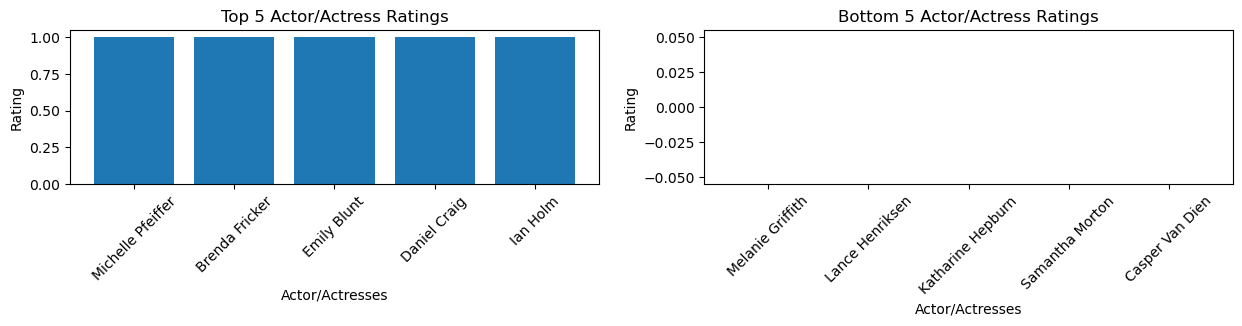

In [64]:
def top_bottom_5s_graph(rating, kind):
    # Graph for best/worst actors

    # Histogram
    people = [item[0] for item in rating]
    top_5_people = people[:5]
    bottom_5_people = people[-5:]

    ratings = [item[1] for item in rating]
    top_5_ratings = ratings[:5]
    bottom_5_ratings = ratings[-5:]

    # Create a histogram
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    ax[0].bar(top_5_people, top_5_ratings)
    ax[1].bar(bottom_5_people, bottom_5_ratings, color='red')

    # Set labels and title
    s = "s" if kind[-1] != "s" else "es" 
    ax[0].set_xlabel(kind + s)
    ax[1].set_xlabel(kind + s)
    ax[0].set_ylabel('Rating')
    ax[1].set_ylabel('Rating')
    ax[0].set_title(f'Top 5 {kind} Ratings')
    ax[1].set_title(f'Bottom 5 {kind} Ratings')

    # Rotate x-axis labels for better visibility
    ax[0].tick_params(axis='x', rotation=45)
    ax[1].tick_params(axis='x', rotation=45)

    # Show the plot
    plt.show()
    
top_bottom_5s_graph(sorted_filtered_actor_rating, 'Actor/Actress')

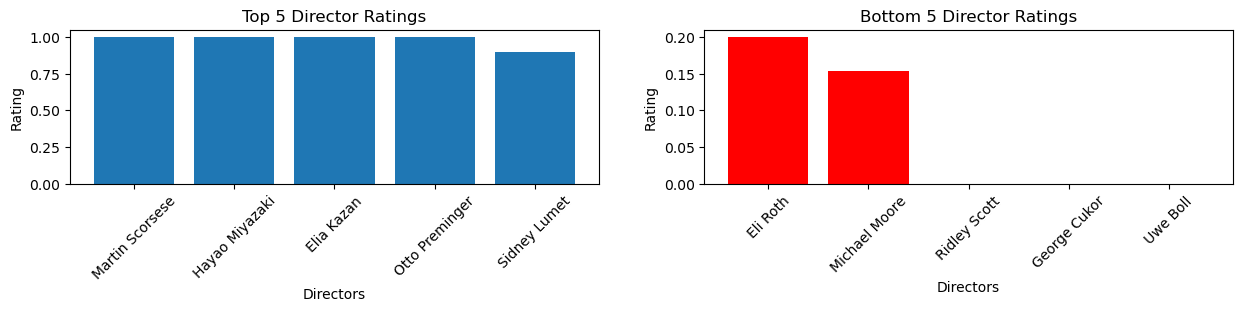

In [65]:
top_bottom_5s_graph(sorted_filtered_director_rating, 'Director')

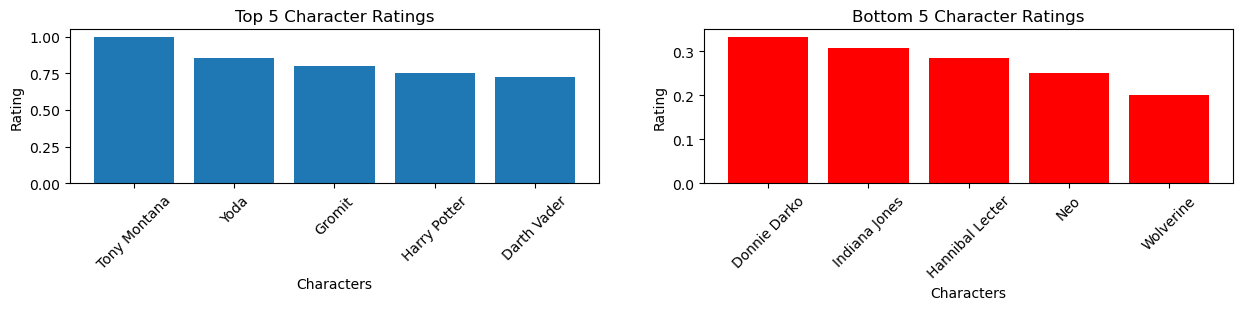

In [66]:
top_bottom_5s_graph(sorted_filtered_character_rating, 'Character')

In [67]:
# import random

# I defined these while trying out things to make the models better
# all_rating = actor_rating + director_rating + character_rating
# all_names_in_reviews = actor_in_reviews + director_in_reviews + character_in_reviews
# pos_names_web = [actor[0] for actor in pos_actor_web_info] + pos_director_web + pos_character_web
# neg_names_web = [actor[0] for actor in neg_actor_web_info] + neg_director_web + neg_character_web

# The below were used while I was trying out stuff like: considering only the first/last names of names,
# taking only a sample of people so that the positive and negative names become balanced, etc.
# pos_names_web_sample = random.sample(pos_names_web, len(neg_names_web))
# neg_names_web_sample = neg_names_web
# all_names_web_sample = pos_names_web_sample + neg_names_web_sample
# first_names_in_reviews = [name.split()[0] for name in director_in_reviews if len(name.split()) >= 2]

def names_in_string(string, name_in_reviews_list):
    """
    Input: a string, typically a movie review, and name_in_reviews_list, a list of some names appearing
    in the movie reviews, e.g. director_in_reviews or actor_in_reviews
    Output: a list of names among name_in_reviews_list that appear in the string. There can be duplicate names.
    """
    result = []
    for name in name_in_reviews_list:
        if name in string:
            result.append(name)
    return result

df_data2['mentioned_names'] = df_data2['modified_text'].apply(lambda x: names_in_string(x,actor_in_reviews))
for i in range(len(df_data2['mentioned_names'])):
    df_data2['mentioned_names'][i] = [name for name in df_data2['mentioned_names'][i] if name.lower() not in {'de', 'De', 'Del'}]
    if len(df_data2['mentioned_names'][i]) == 0:
        df_data2['mentioned_names'][i] = None

df_data2.head()

C:\Users\srhee\AppData\Local\Temp\ipykernel_38032\1921779948.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data2['mentioned_names'][i] = [name for name in df_data2['mentioned_names'][i] if name.lower() not in {'de', 'De', 'Del'}]
C:\Users\srhee\AppData\Local\Temp\ipykernel_38032\1921779948.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data2['mentioned_names'][i] = None


,raw_text,modified_text,sentiment,word_count,entities,mentioned_names
0,One of the other reviewers has mentioned that after watching just Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its...,On re me wa Oz ep yo ho Th ri ex ha me fi th st Oz br un sc vi se ri wo Go Tr sh fa he ti Th sh pu pu re dr se vi It ha cl us wo ca Oz ni gi Os Ma Se St Pe It fo ma Em Ci ex se pr ce gl fr fa in p...,positive,320,"[(ep yo ho, PERSON), (Em Ci ho ma Mu ga, PERSON), (La Ch, PERSON), (de st do, PERSON), (Watching Oz, PERSON)]",None
1,A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors ar...,A wonderful little production The film technique unassuming oldtimebbc fashion give comfort sometimes discomforting sense realism entire piece The actor extremely well choose Michael Sheen get pol...,positive,166,"[(Michael Sheen, PERSON), (Williams, PERSON), (Orton Halliwell, ORG)]",[Michael Sheen]
2,I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy The plot is simplistic but the dialogue is wi...,I think wonderful way spend time hot summer weekend sit air condition theater watch lighthearted comedy The plot simplistic dialogue witty character likable even well bread suspect serial killer W...,positive,172,"[(summer weekend, DATE), (Match Point Risk Addiction, ORG), (Woody Allen, PERSON), (Scarlet Johanson, ORG), (Devil Wears Prada, ORG), (Superman, PERSON)]",[Woody Allen]
3,Basically theres a family where a little boy Jake thinks theres a zombie in his closet his parents are fighting all the timeThis movie is slower than a soap opera and suddenly Jake decides to bec...,Basically there family little boy Jake think there zombie closet parent fight timethis movie slow soap opera suddenly Jake decide become Rambo kill zombieok first youre go make film must Decide th...,negative,141,"[(Jake, PRODUCT), (Rambo, PERSON), (first, ORDINAL), (Parents, GPE), (Jake, PERSON), (Boogeyman, PERSON), (Jake ignore, PERSON)]",None
4,Petter Matteis Love in the Time of Money is a visually stunning film to watch Mr Mattei offers us a vivid portrait about human relations This is a movie that seems to be telling us what money powe...,Petter Matteis Love Time Money visually stun film watch Mr Mattei offer u vivid portrait human relation This movie seem tell u money power success people different situation encounter This variati...,positive,236,"[(Mr Mattei, ORG), (Arthur Schnitzlers, PERSON), (New York, GPE), (one, CARDINAL), (Stylishly, DATE), (one, CARDINAL), (one, CARDINAL), (Steve Buscemi Rosario, PERSON), (Carol Kane, PERSON), (Mich...","[Rosario Dawson, Steve Buscemi]"


In [68]:
df_reviews_with_name = df_data2[['raw_text', 'modified_text', 'sentiment','word_count', 'mentioned_names']].copy()
df_reviews_with_name = df_reviews_with_name[~(df_reviews_with_name['mentioned_names'].isna())]
pd.set_option('display.max_colwidth', 200)
df_reviews_with_name.head(5)

,raw_text,modified_text,sentiment,word_count,mentioned_names
1,A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors ar...,A wonderful little production The film technique unassuming oldtimebbc fashion give comfort sometimes discomforting sense realism entire piece The actor extremely well choose Michael Sheen get pol...,positive,166,[Michael Sheen]
2,I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy The plot is simplistic but the dialogue is wi...,I think wonderful way spend time hot summer weekend sit air condition theater watch lighthearted comedy The plot simplistic dialogue witty character likable even well bread suspect serial killer W...,positive,172,[Woody Allen]
4,Petter Matteis Love in the Time of Money is a visually stunning film to watch Mr Mattei offers us a vivid portrait about human relations This is a movie that seems to be telling us what money powe...,Petter Matteis Love Time Money visually stun film watch Mr Mattei offer u vivid portrait human relation This movie seem tell u money power success people different situation encounter This variati...,positive,236,"[Rosario Dawson, Steve Buscemi]"
5,Probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring It just never gets old despite my having seen it some or more ti...,Probably alltime favorite movie story selflessness sacrifice dedication noble cause preachy bore It never get old despite see time last year Paul Lukas performance bring tear eye Bette Davis one t...,positive,125,"[Bette Davis, Paul Lukas]"
8,Encouraged by the positive comments about this film on here I was looking forward to watching this film Bad mistake Ive seen films and this is truly one of the worst of them its awful in almost ...,Encouraged positive comment film I look forward watch film Bad mistake Ive see film truly one bad awful almost every way edit pace storyline act soundtrack film song lame country tune play le four...,negative,130,[Harvey Keitel]


In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Model Training
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Model Evaluation
    print(f"\n{model_name}")
    print("Accuracy:", (accuracy_score(y_test, y_pred)*100).round(3),"%")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("---------------------------------------------------------------")

# Step 1: Data Preprocessing
X = df_reviews_with_name['mentioned_names'].apply(lambda x: ' '.join(x)).values  # Convert list to string
y = df_reviews_with_name['sentiment']

# Step 2: Feature Extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Step 3: Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Models
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine (linear)": SVC(kernel='linear'),
    "Support Vector Machine (poly)": SVC(kernel='poly'),
    "Support Vector Machine (rbf)": SVC(kernel='rbf'),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100)
}

# Train and evaluate each model
for model_name, model_instance in models.items():
    # Convert sparse matrix to dense matrix for GaussianNB
    if model_name == "Gaussian Naive Bayes":
        X_train_dense = X_train.toarray()
        X_test_dense = X_test.toarray()
        train_evaluate_model(model_instance, X_train_dense, X_test_dense
                            , y_train, y_test, model_name)
    else:
        train_evaluate_model(model_instance, X_train, X_test, y_train, y_test, model_name)


Multinomial Naive Bayes
Accuracy: 62.5 %
Classification Report:
               precision    recall  f1-score   support

    negative       0.57      0.53      0.55       233
    positive       0.66      0.70      0.68       303

    accuracy                           0.62       536
   macro avg       0.62      0.61      0.61       536
weighted avg       0.62      0.62      0.62       536

---------------------------------------------------------------

Logistic Regression
Accuracy: 62.313 %
Classification Report:
               precision    recall  f1-score   support

    negative       0.57      0.52      0.54       233
    positive       0.65      0.71      0.68       303

    accuracy                           0.62       536
   macro avg       0.61      0.61      0.61       536
weighted avg       0.62      0.62      0.62       536

---------------------------------------------------------------

Bernoulli Naive Bayes
Accuracy: 62.687 %
Classification Report:
               precisio

You can replace "director_in_reviews" with different things like "actor_in_reviews", "character_in_reviews," "director_in_reviews + actor_in_reviews", etc. to see how the accuracies measure up. Here are some basic trends I observed:

(1) Considering only the names of directors gave us the highest sentiment prediction accuracy, around 57-66%.

(2) Considering only the names of actors and actresses gave us similar sentiment predictions, around 60%.

(3) Considering only the names of movie characters gave us the lowest sentiment prediction accuracy, around 56%, but had low negative recall, meaning that the model was decent at predicting positive reviews from the names but was bad at predicting negative reviews.

(4) Considering the names of directors and actors/actresses gave us sentiment prediction accuracies around 56%.

(5) Considering the names of actors/actresses and characters gave us sentiment prediction accuracies a little above 50%.

(6) Considering the names of directors and characters gave us sentiment prediction accuracies a little above 50%.

(7) Considering the names of actors/actresses, directors, and movie characters gave us sentiment prediction accuracy of around 56%, but it resulted in legative recall, meaning that the model was decent at predicting positive reviews from the names but was bad at predicting negative reviews.

### Graphical representation of our models

Let us graph the models based on names of directors, actors, and chracters; here, we chose Bernoulli Naive Bayes for actor/actress model, Decision Tree Classifier for director model, and Multinomial Naive Bayes for character model:

In [71]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 5))
    im = sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt=".2%", xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()

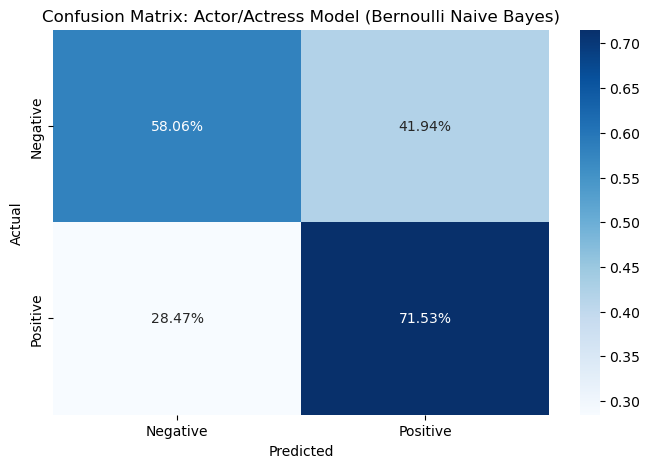

In [72]:
X = df_reviews_with_name['mentioned_names'].apply(lambda x: ' '.join(x)).values  # Convert list to string
y = df_reviews_with_name['sentiment']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

actor_model = BernoulliNB()
actor_model.fit(X_train.toarray(), y_train)
actor_predictions = actor_model.predict(X_test.toarray())

plot_confusion_matrix(y_test, actor_predictions, ['Negative', 'Positive'], "Actor/Actress Model (Bernoulli Naive Bayes)")

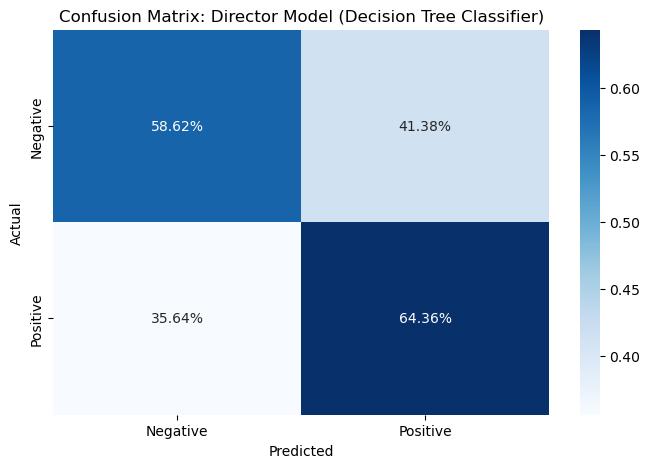

In [73]:
X = df_reviews_with_name['mentioned_names'].apply(lambda x: ' '.join(x)).values  # Convert list to string
y = df_reviews_with_name['sentiment']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

director_model = DecisionTreeClassifier(random_state=42)
director_model.fit(X_train, y_train)
director_predictions = director_model.predict(X_test)

plot_confusion_matrix(y_test, director_predictions, ['Negative', 'Positive'], "Director Model (Decision Tree Classifier)")

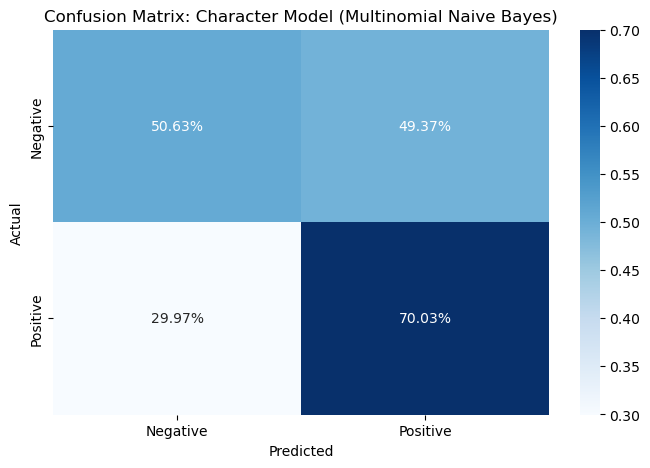

In [74]:
X = df_reviews_with_name['mentioned_names'].apply(lambda x: ' '.join(x)).values  # Convert list to string
y = df_reviews_with_name['sentiment']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

character_model = MultinomialNB()
character_model.fit(X_train, y_train)
character_predictions = character_model.predict(X_test)

plot_confusion_matrix(y_test, character_predictions, ['Negative', 'Positive'], "Character Model (Multinomial Naive Bayes)")


#### Some reasons why our model does not go as high as 80% (say) can be as follows:

(1) We haven't used the names of all actors/actresses/directors/movie characters we could find from the internet. We only picked those that were famous or infamous, and these could be seen as those that affect movie sentiments more than less known actors or actresses/directors/movie characters.

(2) People's judgement of whether a movie is good or bad depends less on how good or bad actors or actresses are, how good or bad the director of the movie are, and how good or bad movie characters are. This is understandable; after all, not all movies that star Daniel Radcliffe, the actor of Harry Potter, are considered great movies! Even within Harry Potter movie series, there are variations of movie reviews for different Harry Potter movies, and there are other movies that Daniel Radcliffe starred but weren't good. We can say similar things for directors and movie characters.

(3) Also, part of the reason why the movie character model has the lowest accuracy among the three may be due to the fact that people may be drawn to 'bad' movie characters, or have an opposing (i.e. complimentary) 'good' movie character in the same movie. Also, we have used most hated movie characters, rather than 'the greatest movie villains', as part of our data; having using the greatest movie villains data from the internet may have increased our movie character model accuracy.

# Topic 3: Movie Genre Prediction

In [75]:
# While these modules have been imported before, we include these for the sake of completion

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import warnings

warnings.filterwarnings("ignore")

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [79]:
import chardet

with open("IMDb movies.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

df = pd.read_csv("IMDb movies.csv", encoding=result['encoding'])
df = df[['genre','description']]
df.head()

,genre,description
0,Romance,The adventures of a female reporter in the 1890s.
1,"Biography, Crime, Drama",True story of notorious Australian outlaw Ned Kelly (1855-80).
2,Drama,"Two men of high rank are both wooing the beautiful and famous equestrian acrobat Stella. While Stella ignores the jeweler Hirsch, she accepts Count von Waldberg's offer to follow her home, ..."
3,"Drama, History",The fabled queen of Egypt's affair with Roman general Marc Antony is ultimately disastrous for both of them.
4,"Adventure, Drama, Fantasy",Loosely adapted from Dante's Divine Comedy and inspired by the illustrations of Gustav Doré the original silent film has been restored and has a new score by Tangerine Dream.


In [80]:
# filter null values
df.isna().any()

genre          False
description     True
dtype: bool

In [81]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace = True)

In [82]:
# Convert multi-label splitted by comma into lists
for i in range(len(df["genre"])):
    df["genre"][i] = df["genre"][i].replace(" ", "")
    df["genre"][i] = list(df["genre"][i].split(","))

In [83]:
# Simplify multi-label into multi-class problem
df['nGenre'] = [0 for i in range(len(df))]
for i in range(len(df)):
    df['nGenre'][i] = len(df['genre'][i])

df = df[df['nGenre']==1]

In [84]:
df = df[['genre','description']]
df['genre'] = [''.join(i) for i in df['genre']]
df.reset_index(drop = True, inplace = True)

In [85]:
# Explore genres with abundant data
df['genre'].value_counts()[0:7]

Drama       12105
Comedy       7146
Horror       2241
Thriller     1217
Action        699
Western       588
Romance       415
Name: genre, dtype: int64

In [86]:
df['genre'].value_counts()[0:7].index

Index(['Drama', 'Comedy', 'Horror', 'Thriller', 'Action', 'Western',
       'Romance'],
      dtype='object')

In [87]:
for genre in df['genre'].value_counts()[0:7].index:
    # Extract the first three letters of the genre in lower case
    short_name = genre[:3].lower()
    # Create a DataFrame using the abbreviated genre name
    variable_name = 'df_' + short_name
    # Create a global variable with the constructed name
    globals()[variable_name] = df[df['genre'] == genre].reset_index(drop=True)[:400]

In [88]:
df_dra.head()

,genre,description
0,Drama,"Two men of high rank are both wooing the beautiful and famous equestrian acrobat Stella. While Stella ignores the jeweler Hirsch, she accepts Count von Waldberg's offer to follow her home, ..."
1,Drama,Richard of Gloucester uses manipulation and murder to gain the English throne.
2,Drama,"After Dr. Friedrich's wife becomes mentally unstable and his research papers are rejected, he leaves the country to respite."
3,Drama,Single mother is separated from her children due to financial struggles.
4,Drama,"Leslie Swayne, an adventurer, in order to obtain enough money to satisfy the needs of his extravagant life, has been bribed to steal the plans of the fortification from the staff officers ..."


In [89]:
# Concatenate all descriptions in drama genre for word cloud visualization
drama_corpus = ' '.join(df_dra['description'])
drama_corpus

'Two men of high rank are both wooing the beautiful and famous equestrian acrobat Stella. While Stella ignores the jeweler Hirsch, she accepts Count von Waldberg\'s offer to follow her home, ... Richard of Gloucester uses manipulation and murder to gain the English throne. After Dr. Friedrich\'s wife becomes mentally unstable and his research papers are rejected, he leaves the country to respite. Single mother is separated from her children due to financial struggles. Leslie Swayne, an adventurer, in order to obtain enough money to satisfy the needs of his extravagant life, has been bribed to steal the plans of the fortification from the staff officers ... John Howard Payne at his most miserable point in life, writes a song which becomes popular and inspires other people at some point in their lives. Assunta Spina is a tragedy set in Naples at the beginning of the twentieth century. Assunta and Michele are in love but others come between them and there is much jealousy. They fight and 

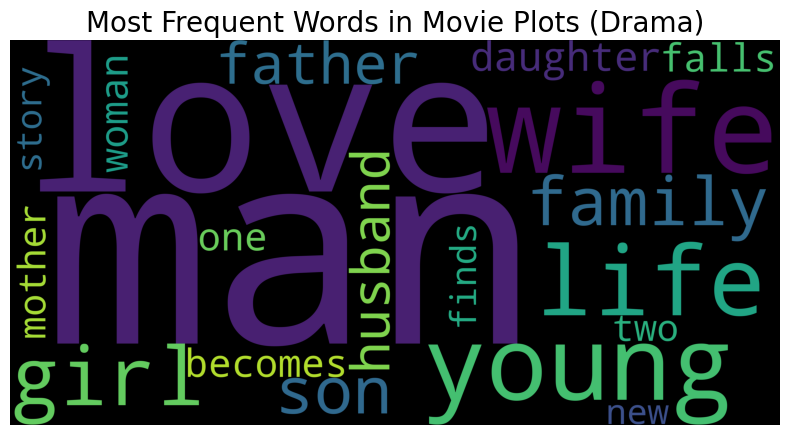

In [92]:
# Uncomment the following line to install wordcloud
# !pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
# wordcloud
wc_drama = WordCloud(stopwords=STOPWORDS, background_color='black', max_words = 20, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(drama_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(10,5))
plt.imshow(wc_drama)
plt.axis('off')
plt.title('Most Frequent Words in Movie Plots (Drama)', fontsize = 20)
plt.show()
# fig.savefig('./img/WordCloudDrama.png');

# We can see patterns of frequent words in the description of movies of type drama
# Notice the existence of "falls" "becomes" "finds": requires NLP preprocessing

In [93]:
# New dataframe with even-sized data in 7 genres
data = pd.concat([df_dra, df_com, df_hor, df_thr, df_act, df_wes, df_rom])
data

,genre,description
0,Drama,"Two men of high rank are both wooing the beautiful and famous equestrian acrobat Stella. While Stella ignores the jeweler Hirsch, she accepts Count von Waldberg's offer to follow her home, ..."
1,Drama,Richard of Gloucester uses manipulation and murder to gain the English throne.
2,Drama,"After Dr. Friedrich's wife becomes mentally unstable and his research papers are rejected, he leaves the country to respite."
3,Drama,Single mother is separated from her children due to financial struggles.
4,Drama,"Leslie Swayne, an adventurer, in order to obtain enough money to satisfy the needs of his extravagant life, has been bribed to steal the plans of the fortification from the staff officers ..."
...,...,...
395,Romance,"Sato is 27 years old, lives in the northern prefecture of Sendai and is single. He is searching for the spark and explosion that will change his life and give him love and romance."
396,Romance,"A family entertainer, the story of Ammammagarillu revolves around a young guy (played by Naga Shaurya) who shares a close bond with his grandmother (played by Sumitra). It depicts the ..."
397,Romance,"Tej, a youngster who's highly attached to his family, is banished from his home by his uncle (Peddananna). He then finds himself in London, where he falls in love with Nandini. After long ..."
398,Romance,The film is a rom-com which explores the life of a young paperboy.


In [94]:
# Convert to all lower cases and strip spaces at both sides of each text string
data['description'] = [str(i).lower().strip() for i in data['description']]
data.reset_index(drop = True, inplace = True)

In [95]:
# remove all non-english character (except for space), including punctuations
non_english_char = [chr(i) for i in range(0, 32)] + [chr(i) for i in range(33, 65)] + [chr(i) for i in range(92, 97)] + [chr(i) for i in range(123, 256)]
for i in range(len(data)):
    for char in non_english_char:
        data["description"][i] = str(data["description"][i]).replace(char, '')

In [96]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# defining the function for lemmatization
def lemmatizer(data):
    wordlist = str(data).split(" ")
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in wordlist]
    lemm_text= [wordnet_lemmatizer.lemmatize(word, pos='v') for word in lemm_text]
    lemm_text = [wordnet_lemmatizer.lemmatize(word, pos='n') for word in lemm_text]
    lemm_text = [wordnet_lemmatizer.lemmatize(word, pos='a') for word in lemm_text]
    lemm_text = [wordnet_lemmatizer.lemmatize(word, pos='r') for word in lemm_text]
    lemm_text = ' '.join(lemm_text)
    return lemm_text

# lemmatize each movie description
data['description']=data['description'].apply(lemmatizer)

In [97]:
# Prepare to display word cloud of texts in each genre after preprocessing
drama_post_corpus = ' '.join(data['description'][0:400])
comedy_post_corpus = ' '.join(data['description'][400:800])
horror_post_corpus = ' '.join(data['description'][800:1200])
thriller_post_corpus = ' '.join(data['description'][1200:1600])
action_post_corpus = ' '.join(data['description'][1600:2000])
western_post_corpus = ' '.join(data['description'][2000:2400])
romance_post_corpus = ' '.join(data['description'][2400:2800])

In [98]:
# Define a funtion to plot word cloud
def wc_plot(ge): 
    corpus_name = globals()[ge + '_post_corpus']
    plot_name = 'wc_' + ge + '_post'
    
    plot_name = WordCloud(stopwords=STOPWORDS, background_color='black', max_words = 20, height=2000, width=4000, random_state = 42, 
                               normalize_plurals = False).generate(corpus_name)

    # Plot the wordcloud
    fig, ax = plt.subplots(figsize=(8,4))
    plt.imshow(plot_name)
    plt.axis('off')
    plt.title(ge, fontsize = 20)
    plt.show()
#   fig.savefig('./img/WordCloud' + ge + '2.png');

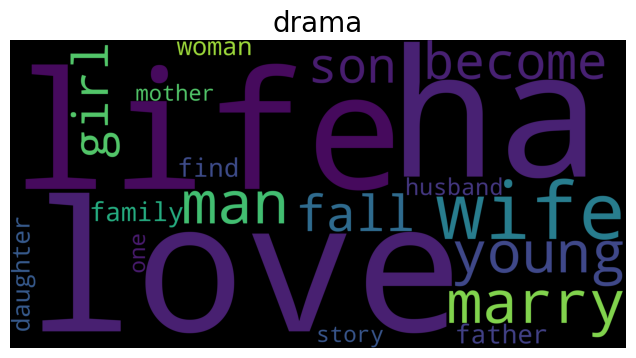

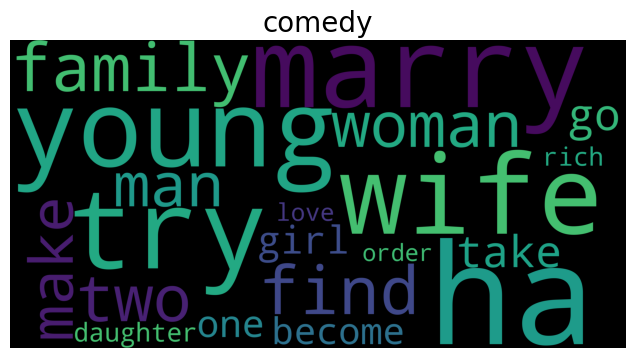

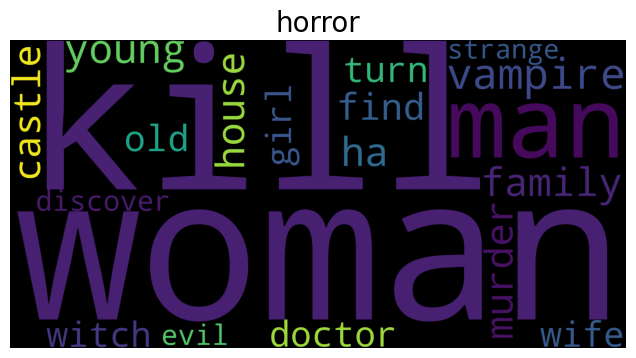

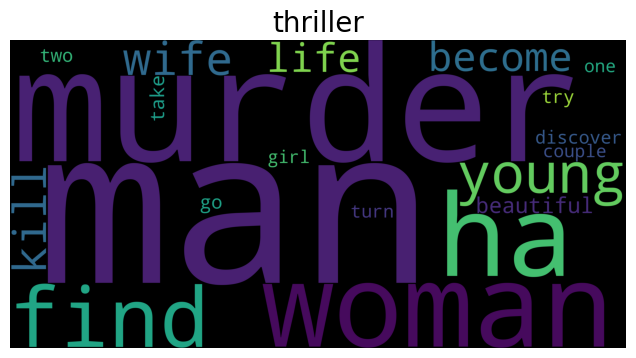

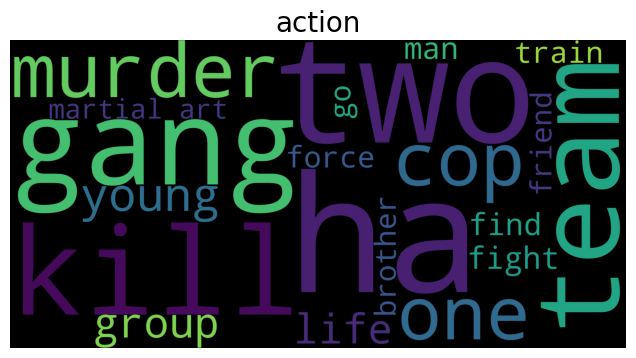

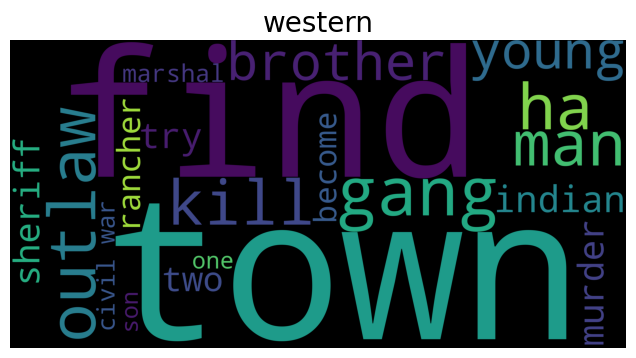

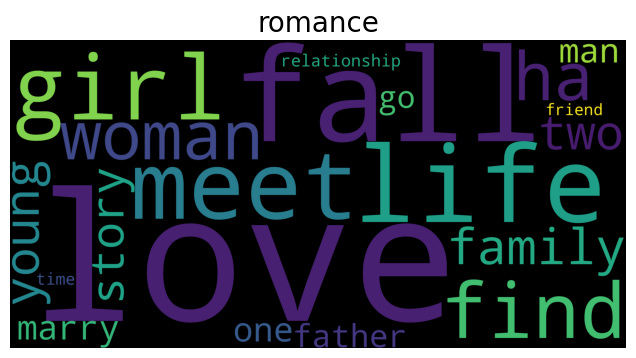

In [99]:
wc_plot('drama')
wc_plot('comedy')
wc_plot('horror')
wc_plot('thriller')
wc_plot('action')
wc_plot('western')
wc_plot('romance')
plt.show() 

In [100]:
# Vectorize words using Tf-Idf
vec = TfidfVectorizer(stop_words = "english")
tfidf = vec.fit_transform(data['description'])
tfidf = tfidf.toarray()
tfidf_df = pd.DataFrame(tfidf, columns = vec.get_feature_names_out())
tfidf_df

,aadi,aage,abacco,abandon,abbey,abbott,abby,abdicate,abduct,abduction,...,zenith,zhai,zhang,zhao,zhigalovs,zinochka,zita,zombie,zoneesque,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
# Prepare features and targets
X = tfidf_df
y = data['genre']

In [124]:
# Split train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [125]:
# Classfier_1: Naive Bayes
# Instantiate a NB classfier object
clf_NaiveBayes = MultinomialNB()
# Train model...
clf_NaiveBayes.fit(x_train, y_train)
# Predict
pred_NaiveBayes = clf_NaiveBayes.predict(x_test)
# Evaluate
print("Multinomial Naive Bayes:")
print(f'Accuracy: {accuracy_score(y_test, pred_NaiveBayes)}')
print(classification_report(y_test, pred_NaiveBayes))

Multinomial Naive Bayes:
Accuracy: 0.6125
              precision    recall  f1-score   support

      Action       0.76      0.74      0.75        82
      Comedy       0.80      0.25      0.38        96
       Drama       0.40      0.50      0.45        74
      Horror       0.58      0.81      0.67        69
     Romance       0.61      0.74      0.67        81
    Thriller       0.55      0.49      0.52        78
     Western       0.71      0.84      0.77        80

    accuracy                           0.61       560
   macro avg       0.63      0.62      0.60       560
weighted avg       0.64      0.61      0.60       560



In [133]:
import os

# function to plot confusion matrix for model evaluation
def plot_cm(method):
    cm = confusion_matrix(y_test, globals()['pred_' + method])

    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a figure explicitly
    plt.figure(figsize=(10, 6))

    # Plot the heatmap using Matplotlib
    im = plt.imshow(cm_normalized, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix: Movie Genre Prediction\nModel:' + method)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_labels = ['Drama', 'Comedy', 'Horror', 'Thriller', 'Action', 'Western', 'Romance']
    plt.xticks([0, 1, 2, 3, 4, 5, 6], tick_labels)
    plt.yticks([0, 1, 2, 3, 4, 5, 6], tick_labels)

    # Add a vertical colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('Normalized Count', rotation=270, labelpad=15)

    # Add text annotations
    for i in range(len(tick_labels)):
        for j in range(len(tick_labels)):
            text = f"{cm_normalized[i, j]*100:.2f}%"
            color_index = (i+j)%2 - 1
            color = ['black','white'][color_index]
            plt.text(j, i, text, ha='center', va='center', color=color)

    # Remove ticks
    plt.tick_params(axis='both', which='both', length=0)

    # Save the figure after showing the plot
    save_dir = './img/'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        
    plt.savefig(os.path.join(save_dir, 'CM_' + method + '.png'))

    # Show the plot
    plt.show()


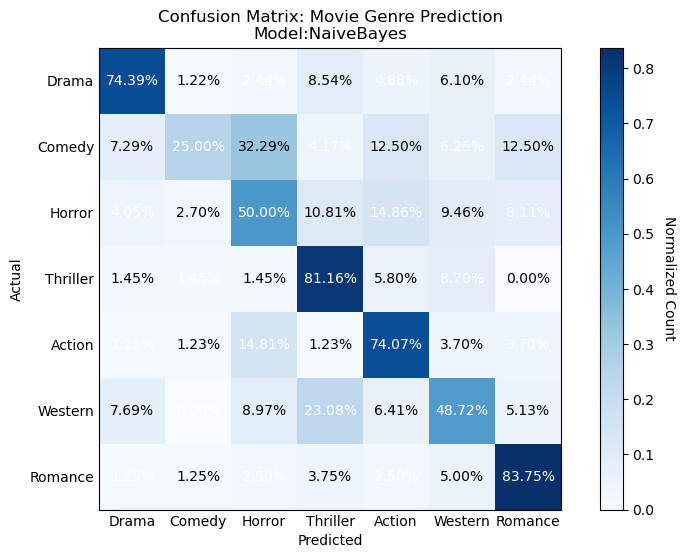

In [134]:
plot_cm('NaiveBayes')

In [135]:
# Classifier_2: Logistic Regression
clf_LogisticRegression = LogisticRegression()
clf_LogisticRegression.fit(x_train, y_train)
pred_LogisticRegression = clf_LogisticRegression.predict(x_test)

print("Logistic Regression:")
print(f'Accuracy: {accuracy_score(y_test, pred_LogisticRegression)}')
print(classification_report(y_test, pred_LogisticRegression))

Logistic Regression:
Accuracy: 0.6285714285714286
              precision    recall  f1-score   support

      Action       0.72      0.73      0.73        82
      Comedy       0.64      0.53      0.58        96
       Drama       0.44      0.49      0.46        74
      Horror       0.65      0.72      0.68        69
     Romance       0.64      0.69      0.67        81
    Thriller       0.51      0.50      0.50        78
     Western       0.81      0.75      0.78        80

    accuracy                           0.63       560
   macro avg       0.63      0.63      0.63       560
weighted avg       0.63      0.63      0.63       560



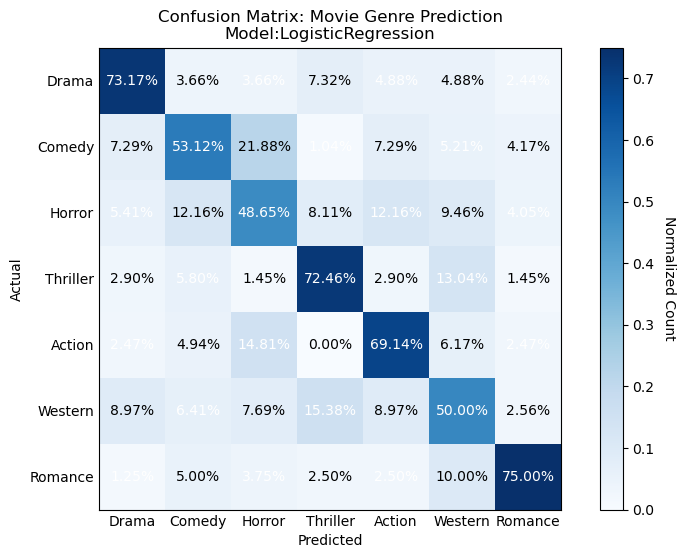

In [136]:
plot_cm('LogisticRegression')

In [137]:
# Classifier_3.1: Linear Support Vector Machine
clf_LinearSVM = SVC(kernel='linear', C=1.0)

clf_LinearSVM.fit(x_train, y_train)
pred_LinearSVM = clf_LinearSVM.predict(x_test)

print("Linear SVM:")
print(f'Accuracy: {accuracy_score(y_test, pred_LinearSVM)}')
print(classification_report(y_test, pred_LinearSVM))

Linear SVM:
Accuracy: 0.6125
              precision    recall  f1-score   support

      Action       0.73      0.67      0.70        82
      Comedy       0.62      0.58      0.60        96
       Drama       0.39      0.49      0.43        74
      Horror       0.70      0.68      0.69        69
     Romance       0.66      0.65      0.66        81
    Thriller       0.44      0.50      0.47        78
     Western       0.84      0.71      0.77        80

    accuracy                           0.61       560
   macro avg       0.63      0.61      0.62       560
weighted avg       0.63      0.61      0.62       560



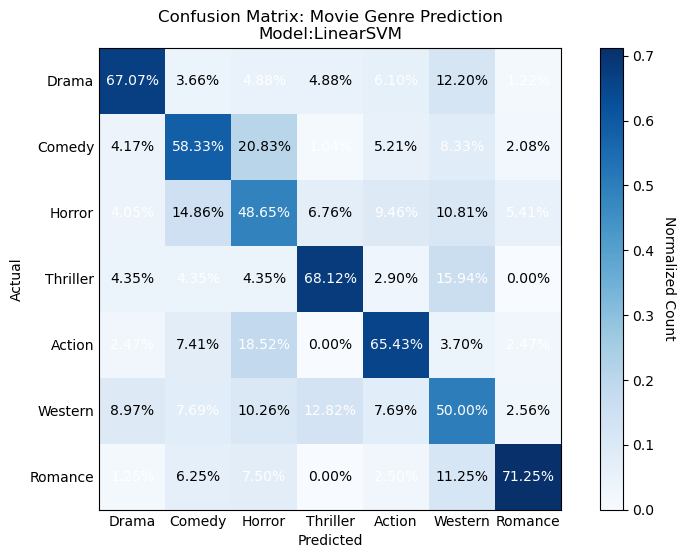

In [138]:
plot_cm('LinearSVM')

In [139]:
# Classifier_3.2: RBF Support Vector Machine
clf_rbfSVM = SVC(kernel='rbf', C=1.0)
clf_rbfSVM.fit(x_train, y_train)
pred_rbfSVM = clf_rbfSVM.predict(x_test)

print("RBF SVM:")
print(f'Accuracy: {accuracy_score(y_test, pred_rbfSVM)}')
print(classification_report(y_test, pred_rbfSVM))

RBF SVM:
Accuracy: 0.6196428571428572
              precision    recall  f1-score   support

      Action       0.81      0.66      0.72        82
      Comedy       0.60      0.58      0.59        96
       Drama       0.38      0.58      0.46        74
      Horror       0.74      0.67      0.70        69
     Romance       0.70      0.62      0.66        81
    Thriller       0.47      0.56      0.51        78
     Western       0.87      0.68      0.76        80

    accuracy                           0.62       560
   macro avg       0.65      0.62      0.63       560
weighted avg       0.66      0.62      0.63       560



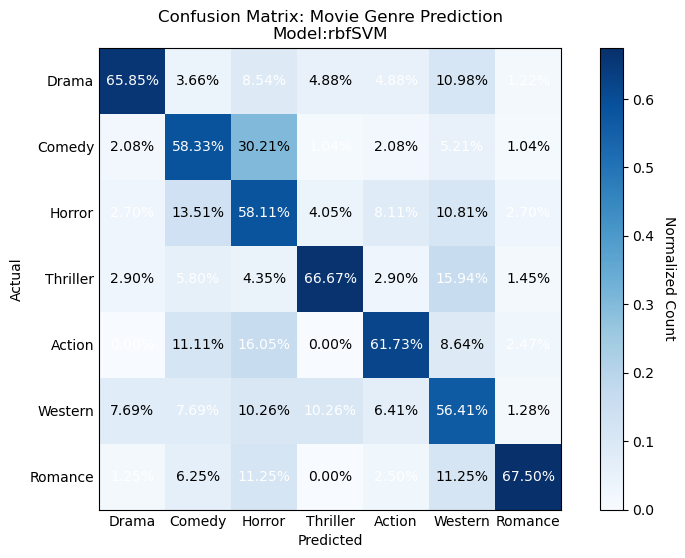

In [140]:
plot_cm('rbfSVM')